# Multi Layer Perceptron Implementation

## Load the Data

In [103]:
import numpy as np
import random 


data = np.load('data.npz')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']

y_test = data['y_test']
y_train = np.array(y_train).flatten()  

# Set Random Seeds
np.random.seed(50)
random.seed(50)
  

## Balance the Classes

In [104]:
from sklearn.utils.class_weight import compute_class_weight


# Assuming your classes are labeled as 0 and 1
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i : class_weights[i] for i in range(len(class_weights))}


print(class_weight_dict)

{0: 0.5167677150435771, 1: 15.409604519774012}


## Build the Model

In [105]:
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
# from keras.metrics import Precision, Recall
from keras import backend as K
from keras.regularizers import l2


def evaluate_model(model, X_train, y_train):
    """Function compliles a model with the given train data

    Args:
        model (model): scikit-learn model
        X_train (matrix): training features
        y_train (matrix): target labels

    Returns:
        object: the training history of the model
    """

    # Reset the session
    K.clear_session()
    
    # Compile the model
    model.compile(optimizer='adam', 
                loss='binary_crossentropy', 
                metrics=['accuracy'])
    
  

    # Train the model
    #model.fit(X_train, y_train, epochs=25, batch_size=32)
    history = model.fit(X_train, y_train, epochs=25, batch_size=32, class_weight=class_weight_dict, shuffle=False)



    return history

## Build different Model Structures

In [106]:

def create_model_1():
    """Structures a simple one layer neural network.

    Returns:
        model: Scikit-learn model to evaluate on test data.
    """
    model_1 = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dense(1, activation='sigmoid')

    ])
    return model_1

def create_model_2():
    """Structures a complex multilayer neural network.

    Returns:
        model: Scikit-learn model to evaluate on test data.
    """
    model_2 = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(46, activation='relu'),
        Dense(24, activation='relu', kernel_regularizer=l2(0.001)),
        Dense(1, activation='sigmoid')
    ])
    return model_2




## Train the different Models

In [107]:
model_1 = create_model_1()
model_2 = create_model_2()

models = [model_1, model_2]
model_pred = []
model_history = []

for model in models:
    
    #Get the details
    model_history.append(evaluate_model(model, X_train, y_train))
    # model_metrics.append([accuracy])
    
    # Make the Predictions
    y_pred = model.predict(X_test)
    model_pred.append(y_pred)

Epoch 1/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.5780 - loss: 246639136.0000
Epoch 2/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.6279 - loss: 52228060.0000
Epoch 3/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.6532 - loss: 35877828.0000
Epoch 4/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.6616 - loss: 26755064.0000
Epoch 5/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.7063 - loss: 24035256.0000
Epoch 6/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.6772 - loss: 26204756.0000
Epoch 7/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.6707 - loss: 20565144.0000
Epoch 8/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.6938 - loss: 19194550.0000
Epoch 9/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.6815 - loss: 21703530.0000
Epoch 10/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.7183 - loss: 19166184.0000
Epoch 11/25
171/171 ━━━━━━━━━━━━━━━━━━━━ 0s 412u

## Results

In [108]:
from sklearn.metrics import classification_report, accuracy_score

# Iterate who all the models
for idx in range(len(model_pred)):
    y_pred = (model_pred[idx] > 0.5).astype(int)
    
    print(f'Model {idx + 1}')
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model 1
Accuracy: 0.9105571847507331

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95      1321
           1       0.06      0.12      0.08        43

    accuracy                           0.91      1364
   macro avg       0.51      0.53      0.51      1364
weighted avg       0.94      0.91      0.93      1364

Model 2
Accuracy: 0.8980938416422287

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.95      1321
           1       0.06      0.16      0.09        43

    accuracy                           0.90      1364
   macro avg       0.52      0.54      0.52      1364
weighted avg       0.94      0.90      0.92      1364



## Graph The Loss

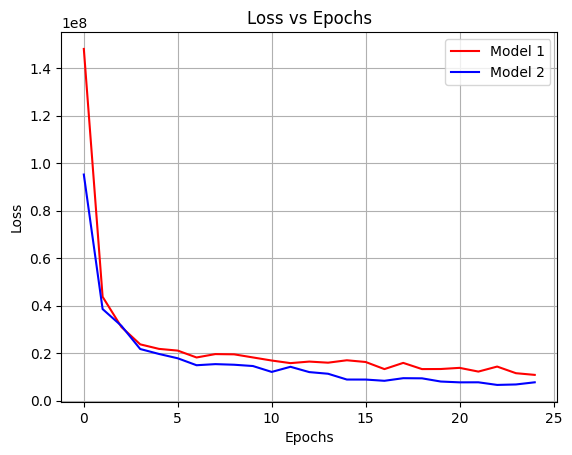

In [109]:
import matplotlib.pyplot as plt

# Get the loss of the Models 
loss_model_1 = model_history[0].history['loss']
loss_model_2 = model_history[1].history['loss']
iterations = list(range(0,25))


# Plot the graph
plt.plot(iterations, loss_model_1, 'r', label= 'Model 1')
plt.plot(iterations, loss_model_2, 'b', label= 'Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid()
plt.show()







In [110]:
model_1.summary()
model_2.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,629 (72.77 KB)

 Trainable params: 6,209 (24.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,420 (48.52 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 46)             │         4,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │         1,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,709 (65.27 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,140 (43.52 KB)